# Linear Algebra

:label:`sec_linear_algebra`


In :numref:`sec_scalar-tensor`, we encountered the basics of linear algebra
and saw how it could be used to express common operations for transforming our data.
Linear algebra is one of the key mathematical pillars
underlying much of the work that we do deep learning 
and in machine learning more broadly.
While :numref:`sec_scalar-tensor` contained enough machinery
to communicate the mechanics of modern deep learning models, 
there is a lot more to the subject than we could fit there (or even here).
In this section, we will go deeper,
highlighting some geometric interpretations of linear algebra operations, 
and introducing a few fundamental concepts, including of eigenvalues and eigenvectors.

## Geometry of Vectors
First, we need to discuss the two common geometric interpretations of vectors, 
as either points or directions in space. 
Fundamentally, a vector is a list of numbers such as the Python list below.

In [1]:
v = [1,7,0,1]

Mathematicians most often write this as either a *column* or *row* vector, which is to say either as

$$
\mathbf{x} = \begin{bmatrix}1\\7\\0\\1\end{bmatrix}
$$

or

$$
\mathbf{x}^\top = \begin{bmatrix}1 & 7 & 0 & 1\end{bmatrix}.
$$ 

These often have different interpretations,
where data points are column vectors
and weights used to form weighted sums are row vectors.
However, it can be beneficial to be flexible.
As a general rule of thumb, we have adopted the convention
of writing single data points and theoretical statements in column vectors,
however we switch to row vectors to represent data points when working with actual data.
This mirrors the fact that the majority of data we encounter is in this format.
This dichotomy in notation is ubiquitous in machine learning literature,
so we match it while recognizing that it can be a bit cumbersome to the beginner.

Given a vector, the first interpretation 
that we should give it is as a point in space. 
In two or three dimensions, we can visualize these points 
by using the components of the vectors to define 
the location of the points in space compared 
to a fixed reference called the *origin*.

![An illustration of visualizing vectors as points in the plane.  The first component of the vector gives the $x$-coordinate, the second component gives the $y$-coordinate.  Higher dimensions are analogous, although much harder to visualize.](../img/GridPoints.svg)

This way of visualizing the data can be freeing, 
and allows us to consider the problem on a more abstract level.
No longer faced with some insurmountable seeming problem 
like classifying pictures as either cats or dogs,
we can start considering tasks abstractly 
as collections of points in space and picturing the task 
as discovering how to separate two distinct clusters of points.

In parallel, there is a second point of view 
that people often take of vectors: as directions in space. 
Not only can we think of the vector $\mathbf{v} = [2,3]^\top$ 
as the location $2$ units to the right and $3$ units up from the origin,
we can also think of it as the direction itself 
to take $2$ steps to the right and $3$ steps up. 
In this way, we consider all the vectors below the same.

![Any vector can be visualized as an arrow in the plane.  In this case, every vector drawn is a representation of the vector $(2,3)$.](../img/ParVec.svg)

One of the benefits of this shift is that
we can make visual sense of the act of vector addition.
In particular, we follow the directions given by one vector,
and then follow the directions given by the other.

![We can visualize vector addition by first following one vector, and then another.](../img/VecAdd.svg)

Vector subtraction has a similar interpretation.
By considering the identity that $\mathbf{u} = \mathbf{v} + (\mathbf{u}-\mathbf{v})$,
we see that the vector $\mathbf{u}-\mathbf{v}$ is the direction 
that takes us from the point $\mathbf{u}$ to the point $\mathbf{v}$.


## Dot Products and Angles
As we saw in :numref:`sec_scalar-tensor`, 
if we take two column vectors say $\mathbf{u}$ and $\mathbf{v}$,
we can form their dot product by computing:

$$
\mathbf{u}^\top\mathbf{v} = \sum_i u_i\cdot v_i.
$$

Because this operation is symmetric, we will mirror the notation 
of classical multiplication and write

$$
\mathbf{u}\cdot\mathbf{v} = \mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u},
$$

to highlight the fact that exchanging the order of the vectors will yield the same answer.

The dot product also admits a geometric interpretation: it is closely related to the angle between two vectors.

![Between any two vectors in the plane there is a well defined angle $\theta$.  We will see this angle is intimately tied to the dot product.](../img/VecAngle.svg)

To start, let us consider two specific vectors:

$$
\mathbf{v} = (r,0) \text{ and } \mathbf{w} = (s\cos(\theta), s \sin(\theta)).
$$

The vector $\mathbf{v}$ is length $r$ and runs parallel to the $x$-axis, 
and the vector $\mathbf{w}$ is of length $s$ and at angle $\theta$ with the $x$-axis.  
If we compute the dot product of these two vectors, we see that

$$
\mathbf{v}\cdot\mathbf{w} = rs\cos(\theta) = \|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta).
$$

With some simple algebraic manipulation, we can rearrange terms to obtain

$$
\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).
$$

In short, for these two specific vectors, 
the dot product tells us the angle between the two vectors. This same fact is true in general. We will not derive the expression here, however,
if we consider writing $\|\mathbf{v} - \mathbf{w}\|^2$ in two ways: 
one with the dot product, and the other geometrically using the law of cosines,
we can obtain the full relationship. 
Indeed, for any two vectors $\mathbf{v}$ and $\mathbf{w}$,
the angle between the two vectors is

$$
\theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right).
$$

This is a nice result since nothing in the computation references two-dimensions.
Indeed, we can use this in three or three million dimensions without issue.

As a simple example, let's see how to compute the angle between a pair of vectors:

In [2]:
%matplotlib inline
import d2l
from IPython import display
from mxnet import gluon, np, npx
npx.set_np()

In [3]:
def angle(v, w) :
    return np.arccos(v.dot(w)/(np.linalg.norm(v)*np.linalg.norm(w)))

angle(np.array([0,1,2]),np.array([2,3,4]))

array(0.41899002)

We will not use it right now, but it is useful to know 
that we will refer to vectors for which the angle is $\pi/2$ 
(or equivalently $90^{\circ}$) as being *orthogonal*. 
By examining the equation above, we see that this happens when $\theta = \pi/2$, 
which is the same thing as $\cos(\theta) = 0$. 
The only way this can happen is if the dot product itself is zero,
and two vectors are orthogonal if and only if $\mathbf{v}\cdot\mathbf{w} = 0$. 
This will prove to be a helpful formula when understanding objects geometrically.

It is reasonable to ask: why is computing the angle useful?
The answer comes in the kind of invariance we expect data to have. 
Consider an image, and a duplicate image,
where every pixel value is the same but $10\%$ the brightness. 
The values of the individual pixels are in general far from the original values.
Thus, if one computed the distance between the original image and the darker one, 
the distance can be large.  
However, for most ML applications, the *content* is the same---it is still 
an image of a cat as far as a cat/dog classifier is concerned. 
However, if we consider the angle, it is not hard to see 
that for any vector $\mathbf{v}$, the angle 
between $\mathbf{v}$ and $0.1\cdot\mathbf{v}$ is zero.
This corresponds to the fact that scaling vectors 
keeps the same direction and just changes the length.
The angle considers the darker image identical.  

Examples like this are everywhere.
In text, we might want the topic being discussed
to not change if we write twice as long of document that says the same thing.
For some encoding (such as counting the number of occurrences of words in some vocabulary), this corresponds to a doubling of the vector encoding the document,
so again we can use the angle.

### Cosine Similarity
In ML contexts where the angle is employed 
to measure the closeness of two vectors, 
practitioners adopt the term *cosine similarity* 
to refer to the portion
$$
\cos(\theta) = \frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}.
$$

The cosine takes a maximum value of $1$ 
when the two vectors point in the same direction,
a minimum value of $-1$ when they point in opposite directions,
and a value of $0$ when the two vectors are orthogonal.
Note that if the components of high-dimensional vectors
are sampled randomly with mean $0$,
their cosine will nearly always be close to $0$.


## Hyperplanes

In addition to working with vectors, another key object 
that you must understand to go far in linear algebra 
is the *hyperplane*, a generalization to higher dimensions
of a line (two dimensions) or of a plane (three dimensions).
In an $n$-dimensional vector space, a hyperplane has $d-1$ dimensions
and divides the space into two half-spaces. 

Let us start with an example.
Suppose we have a column vector $\mathbf{w}=[2,1]^\top$. We want to know, "what are the points $\mathbf{v}$ with $\mathbf{w}\cdot\mathbf{v} = 1$?"
By recalling the connection between dot products and angles above, 
we can see that this is equivalent to 
$$
\|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta) = 1 \; \iff \; \|\mathbf{v}\|\cos(\theta) = \frac{1}{\|\mathbf{w}\|} = \frac{1}{\sqrt{5}}
$$

![Recalling trigonometry, we see the formula $\|\mathbf{v}\|\cos(\theta)$ is the length of the projection of the vector $\mathbf{v}$ onto the direction of $\mathbf{w}$](../img/ProjVec.svg)

If we consider the geometric meaning of this expression,
we see that this is equivalent to saying 
that the length of the projection of $\mathbf{v}$ 
onto the direction of $\mathbf{w}$ is exactly $1/\|\mathbf{w}\|$. 
The set of all points where this is true is a line 
at right angles to the vector $\mathbf{w}$.
If we wanted, we could find the equation for this line 
and see that it is $2x + y = 1$ or equivalently $y = 1 - 2x$.

If we now look at what happens when we ask about the set of points with
$\mathbf{w}\cdot\mathbf{v} > 1$ or $\mathbf{w}\cdot\mathbf{v} < 1$,
we can see that these are cases where the projections 
are longer or shorter than $1/\|\mathbf{w}\|$, respectively.
Thus, those two inequalities define either side of the line.
In this way, we have found a way to cut our space into two halves, 
where all the points on one side have dot product below a threshold, 
and the other side above.

![If we now consider the inequality version of the expression, we see that our hyperplane (in this case: just a line) separates the space into two halves.](../img/SpaceDivision.svg)

The story in higher dimension is much the same.
If we now take $\mathbf{w} = [1,2,3]^\top$
and ask about the points in three dimensions with $\mathbf{w}\cdot\mathbf{v} = 1$,
we obtain a plane at right angles to the given vector $\mathbf{w}$.
The two inequalities again define the two sides of the plane.

![Hyperplanes in any dimension separate the space into two halves.](../img/SpaceDivision3D.svg)

While our ability to visualize runs out at this point,
nothing stops us from doing this in tens, hundreds, or billions of dimensions.
This occurs often when thinking about machine learned models.
For instance, we can understand linear classification models 
like those from :numref:`sec_softmax`,
as methods to find hyperplanes that separate the different target classes.
In this context, such hyperplanes are often referred to as *decision planes*.
The majority of deep learned classification models end 
with a linear layer fed into a softmax, 
so one can interpret the role of the deep neural network 
to be to find a non-linear embedding such that the target classes 
can be separated cleanly by hyperplanes.

To give a hand-built example, notice that we can produce a reasonable model 
to classify tiny images of t-shirts and trousers from the Fashion MNIST dataset 
(seen in :numref:`sec_fashion_mnist`) 
by just taking the vector between their means to define the decision plane
and eyeball a crude threshold.

In [4]:
# Load in the dataset
train = gluon.data.vision.FashionMNIST(train=True) 
test = gluon.data.vision.FashionMNIST(train=False)

X_train_0 = np.stack([x[0] for x in train if x[1] == 0]).astype(float)
X_train_1 = np.stack([x[0] for x in train if x[1] == 1]).astype(float)
X_test = np.stack(
    [x[0] for x in test if x[1] == 0 or x[1] == 1]).astype(float)
y_test = np.stack(
    [x[1] for x in test if x[1] == 0 or x[1] == 1]).astype(float)

# Compute Averages
ave_0 = np.mean(X_train_0,axis=0)
ave_1 = np.mean(X_train_1,axis=0)

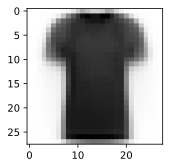

In [5]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28,28).tolist(),cmap='Greys')
d2l.plt.show()

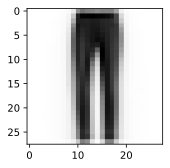

In [6]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28,28).tolist(),cmap='Greys')
d2l.plt.show()

In [7]:
# Print test set accuracy with eyeballed threshold
w = (ave_1 - ave_0).T
predictions = 1*(X_test.reshape(2000,-1).dot(w.flatten()) > -1500000)
np.mean(predictions==y_test)  # Accuracy

array(0.801, dtype=float64)

## Geometry of linear transformations

Through :numref:`sec_scalar-tensor` and the above discussions, 
we have a solid understanding of the geometry of vectors, lengths, and angles. 
However, there is one important object we have omitted discussing, 
and that is a geometric understanding of linear transformations represented by matrices.  Fully internalizing what matrices can do to transform data 
between two potentially different high dimensional spaces takes significant practice,
and is beyond the scope of this appendix. 
However, we can start building up intuition in two dimensions.

Suppose we have some matrix:

$$
\mathbf{A} = \begin{bmatrix}
a & b \\ c & d
\end{bmatrix}.
$$

If we want to apply this to an arbitrary vector 
$\mathbf{v} = [x,y]^\top$, 
we multiply and see that

$$
\begin{aligned}
\mathbf{A}\mathbf{v} & = \begin{bmatrix}a & b \\ c & d\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} \\
& = \begin{bmatrix}ax+by\\ cx+dy\end{bmatrix} \\
& = x\begin{bmatrix}a \\ c\end{bmatrix} + y\begin{bmatrix}b \\d\end{bmatrix} \\
& = x\left\{\mathbf{A}\begin{bmatrix}1\\0\end{bmatrix}\right\} + y\left\{\mathbf{A}\begin{bmatrix}0\\1\end{bmatrix}\right\}.
\end{aligned}
$$

This may seem like an odd computation,
where something clear became somewhat impenetrable.
However, it tells us that we can write the way 
that a matrix transforms *any* vector 
in terms of how it transforms *two specific vectors*: 
$[1,0]^\top$ and $[0,1]^\top$. 
This is worth considering for a moment. 
We have essentially reduced an infinite problem 
(what happens to any pair of real numbers)
to a finite one (what happens to these specific vectors).
These vectors are an example a *basis*, 
where we can write any vector in our space 
as a weighted sum of these *basis vectors*.

Let us draw what happens when we use the specific matrix

$$
\mathbf{A} = \begin{bmatrix}
1 & 2 \\
-1 & 3
\end{bmatrix}.
$$

If we look at the specific vector $\mathbf{v} = [2,-1]^\top$,
we see this is $2\cdot[1,0]^\top + -1\cdot[0,1]^\top$,
and thus we know that the matrix $A$ will send this to 
$2(\mathbf{A}[1,0]^\top) + -1(\mathbf{A}[0,1])^\top = 2[1,-1]^\top - [2,3]^\top = [0,-5]^\top$.
If we follow this logic through carefully,
say by considering the grid of all integer pairs of points,
we see that what happens is that the matrix multiplication
can skew, rotate, and scale the grid,
but the grid structure must remain.

![The matrix $\mathbf{A}$ acting on the given basis vectors.  Notice how the entire grid is transported along with it.](../img/GridTransform.svg)

This is the most important intuitive point 
to internalize about linear transformations represented by matrices.
Matrices are incapable of distorting some parts of space differently than others.
All they can do is take the original coordinates on our space 
and skew, rotate, and scale them.

Some distortions can be severe.  For instance the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix}
$$

compresses the entire two-dimensional plane down to a single line.
Identifying and working with such transformations are the topic of a later section, 
but geometrically we can see that this is fundamentally different 
from the types of transformations we saw above. 
For instance, the result from matrix $\mathbf{A}$ can be "bent back" to the original grid.  The results from matrix $\mathbf{B}$ cannot 
because we will never know where the vector $[1,2]^\top$ came from---was 
it $[1,1]^\top$ or $[0,-1]^\top$?

While this picture was for a $2\times2$ matrix, 
nothing prevents us from taking the lessons learned into higher dimensions.
If we take similar basis vectors like $[1,0,\ldots,0]$ 
and see where our matrix sends them, 
we can start to get a feeling for how the matrix multiplication 
distorts the entire space in whatever dimension space we are dealing with.

## Linear Dependence

Consider again the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & -1 \\ 4 & -2
\end{bmatrix}.
$$

This compresses the entire plane down to live on the single line $y = 2x$.
The question now arises: is there some way we can detect this
just looking at the matrix itself?
The answer is that indeed we can.
Lets take $\mathbf{b}_1 = [2,4]^\top$ and $\mathbf{b}_2 = [-1,-2]^\top$ 
be the two columns of $\mathbf{B}$.
Remember that we can write everything transformed by the matrix $\mathbf{B}$
as a weighted sum of the columns of the matrix: 
like $a_1\mathbf{b}_1 + a_2\mathbf{b}_2$.
We call this a *linear combination*. 
The fact that $\mathbf{b}_1 = -2\cdot\mathbf{b}_2$ 
means that we can write any linear combination of those two columns 
entirely in terms of say $\mathbf{b}_2$ since

$$
a_1\mathbf{b}_1 + a_2\mathbf{b}_2 = -2a_1\mathbf{b}_2 + a_2\mathbf{b}_2 = (a_2-2a_1)\mathbf{b}_2.
$$

This means that one of the columns is, in a sense, redundant 
because it does not define a unique direction in space. 
This should not surprise us too much 
since we already saw that this matrix 
collapses the entire plane down into a single line.
Moreover, we see that the linear dependence 
$\mathbf{b}_1 = -2\cdot\mathbf{b}_2$ captures this. 
To make this more symmetrical between the two vectors, we will write this as

$$
\mathbf{b}_1  + 2\cdot\mathbf{b}_2 = 0.
$$

In general, we will say that a collection of vectors
$\mathbf{v}_1, \ldots \mathbf{v}_k$ are *linearly dependent* 
if there exist coefficients $a_1, \ldots, a_k$ *not all equal to zero* so that

$$
\sum_{i=1}^k a_i\mathbf{v_i} = 0.
$$

In this case, we can solve for one of the vectors 
in terms of some combination of the others, 
and effectively render it redundant.
Thus, a linear dependence in the columns of a matrix 
is a witness to the fact that our matrix 
is compressing the space down to some lower dimension.
If there is no linear dependence we say the vectors are *linearly independent*. 
If the columns of a matrix are linearly independent, 
no compression occurs and the operation can be undone.

## Rank

If we have a general $n\times m$ matrix,
it is reasonable to ask what dimension space the matrix maps into.
A concept known as the *rank* will be our answer.
In the previous section, we noted that a linear dependence
bears witness to compression of space into a lower dimension 
and so we will be able to use this to define the notion of rank. 
In particular, the rank of a matrix $\mathbf{A}$ 
is the largest number of linearly independent columns 
amongst all subsets of columns. For example, the matrix

$$
\mathbf{B} = \begin{bmatrix}
2 & 4 \\ -1 & -2
\end{bmatrix},
$$

has $\mathrm{rank}(B)=1$, since the two columns are linearly dependent,
but either column by itself is not linearly dependent.
For a more challenging example, we can consider

$$
\mathbf{C} = \begin{bmatrix}
1& 3 & 0 & -1 & 0 \\
-1 & 0 & 1 & 1 & -1 \\
0 & 3 & 1 & 0 & -1 \\
2 & 3 & -1 & -2 & 1
\end{bmatrix},
$$

and show that $\mathbf{C}$ has rank two since, for instance,
the first two columns are linearly independent,
however any of the four collections of three columns are dependent.  

This procedure, as described, is very inefficient. 
It requires looking at every subset of the columns of our given matrix,
and thus is potentially exponential in the number of columns.
Later we will see a more computationally efficient way 
to compute the rank of a matrix, but for now, 
this is sufficient to see that the concept 
is well defined and understand the meaning.

## Invertibility

We have seen above that multiplication by a matrix with linearly dependent columns
cannot be undone, i.e., there is no inverse operation that can always recover the input.  However, multiplication by a full-rank matrix 
(i.e., some $\mathbf{A}$ that is $n \times n$ matrix with rank $n$), 
we should always be able to undo it.  Consider the matrix

$$
\mathbf{I} = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 
\end{bmatrix}.
$$

which is the matrix with ones along the diagonal, and zeros elsewhere. 
We call this the *identity* matrix. 
It is the matrix which leaves our data unchanged when applied. 
To find a matrix which undoes what our matrix $\mathbf{A}$ has done,
we want to find a matrix $\mathbf{A}^{-1}$ such that

$$
\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}.
$$

If we look at this as a system, we have $n \times n$ unknowns 
(the entries of $\mathbf{A}^{-1}$) and $n \times n$ equations 
(the equality that needs to hold between every entry of the product $\mathbf{A}^{-1}\mathbf{A}$ and every entry of $\mathbf{I}$) 
so we should generically expect a solution to exist. 
Indeed, in the next section we will see a quantity called the *determinant*,
which has the property that as long as the determinant is not zero, we can find a solution.  We call such a matrix $\mathbf{A}^{-1}$ the *inverse* matrix.
As an example, if $\mathbf{A}$ is the general $2 \times 2$ matrix 

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d 
\end{bmatrix},
$$

then we can see that the inverse is

$$
 \frac{1}{ad-bc}  \begin{bmatrix}
d & -b \\
-c & a 
\end{bmatrix}.
$$

We can test to see this by seeing that multiplying 
by the inverse given by the formula above works in practice.

In [8]:
M = np.array([[1,2],[1,4]])
M_inv = np.array([[2,-1],[-0.5,0.5]])
M_inv.dot(M)

array([[1., 0.],
       [0., 1.]])

### Numerical Issues
While the inverse of a matrix is useful in theory, 
we must say that most of the time we do not wish 
to *use* the matrix inverse to solve a problem in practice. 
In general, there are far more numerically stable algorithms 
for solving linear equations like

$$
\mathbf{A}\mathbf{x} = \mathbf{b},
$$

than computing the inverse and multiplying to get

$$
\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}.
$$

Just as division by a small number can lead to numerical instability,
so can inversion of a matrix which is close to having low rank.

Moreover, it is common that the matrix $\mathbf{A}$ is *sparse*, 
which is to say that it contains only a small number of non-zero values. 
If we were to explore examples, we would see 
that this does not mean the inverse is sparse. 
Even if $\mathbf{A}$ was a $1$ million by $1$ million matrix 
with only $5$ million non-zero entries 
(and thus we need only store those $5$ million), 
the inverse will typically have almost every entry non-negative,
requiring us to store all $1\text{M}^2$ entries---that is $1$ trillion entries!

While we do not have time to dive all the way into the thorny numerical issues 
frequently encountered when working with linear algebra, 
we want to provide you with some intuition about when to proceed with caution, 
and generally avoiding inversion in practice is a good rule of thumb.

## Determinant
The geometric view of linear algebra gives an intuitive way 
to interpret a a fundamental quantity known as the *determinant*.
Consider the grid image from before.

![The matrix $\mathbf{A}$ again distorting the grid.  This time, I want to draw particular attention to what happens to the highlighted square.](../img/GridTransformFilled.svg)

Look at the highlighted square.  This is a square with edges given
by $(0,1)$ and $(1,0)$ and thus it has area one.
After $\mathbf{A}$ transforms this square,
we see that it becomes a parallelogram.
There is no reason this parallelogram should have the same area
that we started with, and indeed in the specific case shown here of

$$
\mathbf{A} = \begin{bmatrix}
1 & -1 \\
2 & 3
\end{bmatrix},
$$

it is an exercise in coordinate geometry to compute 
the area of this parallelogram and obtain that the area is $5$.

In general, if we have a matrix

$$
\mathbf{A} = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix},
$$

we can see with some computation that the area 
of the resulting parallelogram is $ad-bc$.
This area is referred to as the *determinant*.

Let us check this quickly with some example code.

In [9]:
import numpy as np
np.linalg.det(np.array([[1,-1],[2,3]]))

5.000000000000001

The eagle-eyed amongst us will notice 
that this expression can be zero or even negative.
For the negative term, this is a matter of convention 
taken generally in mathematics: 
if the matrix flips the figure, 
we say the area is negated.
Let us see now that when the determinant is zero, we learn more.

Let us consider

$$
\mathbf{B} = \begin{bmatrix}
2 & 4 \\ -1 & -2
\end{bmatrix}.
$$

If we compute the determinant of this matrix,
we get $2\cdot(-2 ) - 4\cdot(-1) = 0$.
Given our understanding above, this makes sense. 
$\mathbf{B}$ compresses the square from the original image 
down to a line segment, which has zero area.
And indeed, being compressed into a lower dimensional space 
is the only way to have zero area after the transformation.
Thus we see the following result is true:
a matrix $A$ is invertible if and only if 
the determinant is not equal to zero.

As a final comment, imagine that we have any figure drawn on the plane.
Thinking like computer scientists, we can decompose 
that figure into a collection of little squares 
so that the area of the figure is in essence 
just the number of squares in the decomposition.
If we now transform that figure by a matrix,
we send each of these squares to parallelograms,
each one of which has area given by the determinant.
We see that for any figure, the determinant gives the (signed) number 
that a matrix scales the area of any figure.

Computing determinants for larger matrices can be laborious,
but the  intuition is the same.
The determinant remains the factor 
that $n\times n$ matrices scale $n$-dimensional volumes.

## Eigendecompositions
Eigenvalues are often one of the most useful notions 
we will encounter when studying linear algebra, 
however, as a beginner, it is easy to overlook their importance.
Below, we introduce eigendecomposition and 
try to convey some sense of just why it is so important. 

Suppose we have a matrix $A$ with the following entries:

$$
\mathbf{A} = \begin{bmatrix}
2 & 0 \\
0 & -1
\end{bmatrix}.
$$

If we apply $A$ to any vector $\mathbf{v} = [x,y]^\top$, 
we obtain a vector $\mathbf{v}A = [2x,-y]^\top$.
This has an intuitive interpretation:
stretch the vector to be twice as wide in the $x$-direction,
and then flip it in the $y$-direction.

However, there are *some* vectors for which something remains unchanged.
Namely $[1,0]^\top$ gets sent to $[2,0]^\top$
and $[0,1]^\top$ gets sent to $[0,-1]^\top$.
These vectors are still in the same line,
and the only modification is that the matrix stretches them
by a factor of $2$ and $-1$ respectively.
We call such vectors *eigenvectors*
and the factor they are stretched by *eigenvalues*.

In general, if we can find a number $\lambda$ 
and a vector $\mathbf{v}$ such that 

$$
\mathbf{A}\mathbf{v} = \lambda \mathbf{v}.
$$

We say that $\mathbf{v}$ is an eigenvector for $A$ and $\lambda$ is an eigenvalue.

### Finding Eigenvalues
Let us figure out how to find them.  
By subtracting off the $\lambda \vec v$ from both sides,
and then factoring out the vector,
we see the above is equivalent to:

$$
(\mathbf{A} - \lambda \mathbf{I})\mathbf{v} = 0.
$$

For this to happen, we see that $(\mathbf{A} - \lambda \mathbf{I})$ 
must compress some direction down to zero, 
hence it is not invertible, and thus the determinant is zero.
Thus, we can find the *eigenvalues* 
by finding for what $\lambda$ is $\det(\mathbf{A}-\lambda \mathbf{I}) = 0$.
Once we find the eigenvalues, we can solve 
$\mathbf{A}\mathbf{v} = \lambda \mathbf{v}$ 
to find the associated *eigenvector(s)*.

### An Example
Let us see this with a more challenging matrix

$$
\mathbf{A} = \begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}.
$$

If we consider $\det(\mathbf{A}-\lambda \mathbf{I}) = 0$, 
we see this is equivalent to the polynomial equation
$0 = (2-\lambda)(3-\lambda)-2 = (4-\lambda)(1-\lambda)$.
Thus, two eigenvalues are $4$ and $1$.
To find the associated vectors, we then need to solve

$$
\begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}x \\ y\end{bmatrix}  \text{ and }
\begin{bmatrix}
2 & 2\\
1 & 3 
\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix}  = \begin{bmatrix}4x \\ 4y\end{bmatrix} .
$$

We can solve this with the vectors $[1,-1]^\top$ and $[1,2]^\top$ respectively.

We can check this in code using the built-in numpy `numpy.linalg.eig` routine.

In [10]:
np.linalg.eig(np.array([[2,1],[2,3]]))

(array([1., 4.]), array([[-0.70710678, -0.4472136 ],
        [ 0.70710678, -0.89442719]]))

Note that `numpy` normalizes the eigenvectors to be of length one,
whereas we took ours to be of arbitrary length.
Additionally, the choice of sign is arbitrary.
However, the vectors computed are parallel 
to the ones we found by hand with the same eigenvalues.

### Decomposing Matrices
Let us continue the previous example one step further.  Let

$$
\mathbf{W} = \begin{bmatrix}
1 & 1 \\
-1 & 2
\end{bmatrix},
$$

be the matrix where the columns are the eigenvectors of the matrix $\mathbf{A}$. Let

$$
\boldsymbol{\Sigma} = \begin{bmatrix}
1 & 0 \\
0 & 4
\end{bmatrix},
$$

be the matrix with the associated eigenvalues on the diagonal.
Then the definition of eigenvalues and eigenvectors tells us that

$$
\mathbf{A}\mathbf{W} =\mathbf{W} \boldsymbol{\Sigma} .
$$

The matrix $W$ is invertible, so we may multiply both sides by $W^{-1}$ on the right,
we see that we may write

$$
\mathbf{A} = \mathbf{W} \boldsymbol{\Sigma} \mathbf{W}^{-1}.
$$

In the next section we will see some nice consequences of this,
but for now we need only know that such a decomposition 
will exist as long as we can find a full collection 
of linearly independent eigenvectors (so that $W$ is invertible).

### Operations on Eigendecompositions
One nice thing about eigendecompositions is that 
we can write many operations we usually encounter cleanly 
in terms of the eigendecomposition.  
As a first example, consider:

$$
\mathbf{A}^n = \overbrace{\mathbf{A}\cdots \mathbf{A}}^{\text{$n$ times}} = \overbrace{(\mathbf{W}\boldsymbol{\Sigma} \mathbf{W}^{-1})\cdots(\mathbf{W}\boldsymbol{\Sigma} \mathbf{W}^{-1})}^{\text{$n$ times}} =  \mathbf{W}\overbrace{\boldsymbol{\Sigma}\cdots\boldsymbol{\Sigma}}^{\text{$n$ times}}\mathbf{W}^{-1} = \mathbf{W}\boldsymbol{\Sigma}^n \mathbf{W}^{-1}.
$$

This tells us that for any positive power of a matrix,
the eigendecomposition is obtained by just raising the eigenvalues to the same power.
The same can be shown for negative powers,
so if we want to invert a matrix we need only consider

$$
\mathbf{A}^{-1} = \mathbf{W}\boldsymbol{\Sigma}^{-1} \mathbf{W}^{-1},
$$

or in other words, just invert each eigenvalue.
This will work as long as each eigenvalue is non-zero,
so we see that invertible is the same as having no zero eigenvalues.  

Indeed, additional work can show that if $\lambda_1, \ldots, \lambda_n$ 
are the eigenvalues of a matrix, then the determinant of that matrix is

$$
\det(\mathbf{A}) = \lambda_1 \cdots \lambda_n,
$$

or the product of all the eigenvalues.
This makes sense intuitively because whatever stretching $\mathbf{W}$ does, 
$W^{-1}$ undoes it, so in the end the only stretching that happens is 
by multiplication by the diagonal matrix $\boldsymbol{\Sigma}$, 
which stretches volumes by the product of the diagonal elements.

Finally, recall that the rank was the maximum number 
of linearly independent columns of your matrix.
By examining the eigendecomposition closely,
we can see that the rank is the same 
as the number of non-zero eigenvalues of $\mathbf{A}$.

The examples could continue, but hopefully the point is clear:
eigendecompositions can simplify many linear-algebraic computations
and are a fundamental operation underlying many numerical algorithms
and much of the analysis that we do in linear algebra. 

### Eigendecompositions of Symmetric Matrices
It is not always possible to find enough linearly independent eigenvectors 
for the above process to work. For instance the matrix

$$
\mathbf{A} = \begin{bmatrix}
1 & 1 \\
0 & 1
\end{bmatrix},
$$

has only a single eigenvector, namely $(0,1)$. 
To handle such matrices, we require more advanced techniques 
than we can cover (such as the Jordan Normal Form, or Singular Value Decomposition).
We will often need to restrict our attention to those matrices 
where we can guarantee the existence of a full set of eigenvectors.

The most commonly encountered family are the *symmetric matrices*,
which are those matrices where $\mathbf{A} = \mathbf{A}^\top$. 
In this case, we may take $W$ to be an *orthogonal matrix*—a matrix whose columns are all length one vectors that are at right angles to one another, where 
$\mathbf{W}^\top = \mathbf{W}^{-1}$—and all the eigenvalues will be real.  
Thus, in this special case, we can write the decomposition as

$$
\mathbf{A} = \mathbf{W}\boldsymbol{\Sigma}\mathbf{W}^\top .
$$

### Gershgorin Circle Theorem
Eigenvalues are often difficult to reason with intuitively.
If presented an arbitrary matrix, there is little that can be said
about what the eigenvalues are without computing them.
There is, however, one theorem that can make it easy to approximate well 
if the largest values are on the diagonal.

Let $\mathbf{A} = (a_{ij})$ be any square matrix ($n\times n$).
We will define $r_i = \sum_{j \neq i} |a_{ij}|$.
Let $\mathcal{D}_i$ represent the disc in the complex plane 
with center $a_{ii}$ radius $r_i$.
Then, every eigenvalue of $\mathbf{A}$ is contained in one of the $\mathcal{D}_i$.

This can be a bit to unpack, so let us look at an example.  
Consider the matrix:

$$
\mathbf{A} = \begin{bmatrix}
1.0 & 0.1 & 0.1 & 0.1 \\
0.1 & 3.0 & 0.2 & 0.3 \\
0.1 & 0.2 & 5.0 & 0.5 \\
0.1 & 0.3 & 0.5 & 9.0
\end{bmatrix}.
$$

We have $r_1 = 0.3$, $r_2 = 0.6$, $r_3 = 0.8$ and $r_4 = 0.9$.
The matrix is symmetric, so all eigenvalues are real.
This means that all of our eigenvalues will be in one of the ranges of 

$$[a_{11}-r_1,a_{11}+r_1] = [0.7,1.3], $$

$$[a_{22}-r_2,a_{22}+r_2] = [2.4,3.6], $$

$$[a_{33}-r_3,a_{33}+r_3] = [4.2,5.8], $$

$$[a_{44}-r_4,a_{44}+r_4] = [8.1,9.9]. $$


Performing the numerical computation shows 
that the eigenvalues are approximately $0.99$, $2.97$, $4.95$, $9.08$,
all comfortably inside the ranges provided.

In [11]:
A = np.array([[1.0, 0.1, 0.1, 0.1],
              [0.1, 3.0, 0.2, 0.3],
              [0.1, 0.2, 5.0, 0.5],
              [0.1, 0.3, 0.5, 9.0]])

v, _ = np.linalg.eig(A)
v

array([9.08033648, 0.99228545, 4.95394089, 2.97343718])

In this way, eigenvalues can be approximated, 
and the approximations will be fairly accurate 
in the case that the diagonal is 
significantly larger than all the other elements.  

It is a small thing, but with a complex 
and subtle topic like eigendecomposition, 
it is good to get any intuitive grasp we can.

### A useful application: The growth of iterated maps

Now that we understand what eigenvectors are in principle,
let us see how they can be used to provide a deep understanding 
of a problem central to neural network behavior: proper weight initialization. 

### Eigenvectors as Long Term Behavior

The full mathematical investigation of the initialization 
of deep neural networks is beyond the scope of the text, 
but we can see a toy version here to understand
how eigenvalues can help us see how these models work.
As we know, neural networks operate by interspersing layers 
of linear transformations with non-linear operations.
For simplicity here, we will assume that there is no non-linearity,
and that the transformation is a single repeated matrix operation $A$,
so that the output of our model is

$$
\mathbf{v}_{out} = \mathbf{A}\cdot \mathbf{A}\cdots \mathbf{A} \mathbf{v}_{in} = \mathbf{A}^N \mathbf{v}_{in}.
$$

When these models are initialized, $A$ is taken to be 
a random matrix with Gaussian entries, so let us make one of those. 
To be concrete, we start with a mean zero, variance one Gaussian distributed $5 \times 5$ matrix.

In [12]:
np.random.seed(8675309)

k = 5
A = np.random.randn(k,k)
A

array([[ 0.58902366,  0.73311856, -1.1621888 , -0.55681601, -0.77248843],
       [-0.16822143, -0.41650391, -1.37843129,  0.74925588,  0.17888446],
       [ 0.69401121, -1.9780535 , -0.83381434,  0.56437344,  0.31201299],
       [-0.87334496,  0.15601291, -0.38710108, -0.23920821,  0.88850104],
       [ 1.29385371, -0.76774106,  0.20131613,  0.91800842,  0.38974115]])

### Behavior on random data
For simplicity in our toy model, 
we will assume that the data vector we feed in $\mathbf{v}_{in}$ 
is a random five dimensional Gaussian vector.
Let us think about what we want to have happen.
For context, lets think of a generic ML problem,
where we are trying to turn input data, like an image, into a prediction, 
like the probability the image is a picture of a cat.
If repeated application of $\mathbf{A}$ 
stretches a random vector out to be very long, 
then small changes in input will be amplified 
into large changes in output---tiny modifications of the input image
would lead to vastly different predictions.
This does not seem right!

On the flip side, if $\mathbf{A}$ shrinks random vectors to be shorter,
then after running through many layers, the vector will essentially shrink to nothing, 
and the output will not depend on the input. This is also clearly not right either!

We need to walk the narrow line between growth and decay 
to make sure that our output changes depending on our input—but not much!

Let us see what happens when we repeatedly multiply our matrix $\mathbf{A}$ 
against a random input vector, and keep track of the norm.

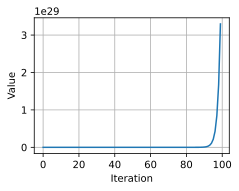

In [13]:
# Calculate the sequence of norms after repeatedly applying A
v_in = np.random.randn(k,1)

norm_list = [np.linalg.norm(v_in)]
for i in range(1,100):
    v_in = A.dot(v_in)
    norm_list.append(np.linalg.norm(v_in))
    
d2l.plot(np.arange(0,100),norm_list,'Iteration','Value')

The norm is growing uncontrollably! 
Indeed if we take the list of quotients, we will see a pattern.

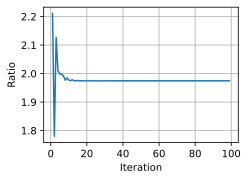

In [14]:
# Compute the scaling factor of the norms
norm_ratio_list = []
for i in range(1,100):
    norm_ratio_list.append(norm_list[i]/norm_list[i-1])
    
d2l.plot(np.arange(1,100),norm_ratio_list,'Iteration','Ratio')

If we look at the last portion of the above computation, 
we see that the random vector is stretched by a factor of `1.974459321485[...]`,
where the portion at the end shifts a little, 
but the stretching factor is stable.  

### Relating back to eigenvectors

We have seen that eigenvectors and eigenvalues correspond 
to the amount something is stretched, 
but that was for specific vectors, and specific stretches.
Let us take a look at what they are for $\mathbf{A}$.
A bit of a caveat here: it turns out that to see them all,
we will need to go to complex numbers.
You can think of these as stretches and rotations.
By taking the norm of the complex number
(square root of the sums of squares of real and imaginary parts)
we can measure that stretching factor. Let us also sort them.

In [15]:
# Compute the Eigenvalues
eigs = np.linalg.eigvals(A).tolist()
norm_eigs = [np.absolute(x) for x in eigs]
norm_eigs.sort()
"Norms of eigenvalues: {}".format(norm_eigs)

'Norms of eigenvalues: [0.8786205280381857, 1.2757952665062624, 1.4983381517710659, 1.4983381517710659, 1.974459321485074]'

### An observation

We see something a bit unexpected happening here: 
that number we identified before for the 
long term stretching of our matrix $\mathbf{A}$ 
applied to a random vector is *exactly* 
(accurate to thirteen decimal places!) 
the largest eigenvalue of $\mathbf{A}$.
This is clearly not a coincidence!

But, if we now think about what is happening geometrically,
this starts to make sense. Consider a random vector. 
This random vector points a little in every direction, 
so in particular, it points at least a little bit 
in the same direction as the eigenvector of $\mathbf{A}$
associated with the largest eigenvalue.
This is so important that it is called 
the *principle eigenvalue* and *principle eigenvector*.
After applying $\mathbf{A}$, our random vector 
gets stretched in every possible direction,
as is associated with every possible eigenvector,
but it is stretched most of all in the direction 
associated with this principle eigenvector.
What this means is that after apply in $A$, 
our random vector is longer, and points in a direction 
closer to being aligned with the principle eigenvector.
After applying the matrix many times, 
the alignment with the principle eigenvector becomes closer and closer until, 
for all practical purposes, our random vector has been transformed 
into the principle eigenvector!
Indeed this algorithm is the basis 
for what is known as the [power iteration method](https://en.wikipedia.org/wiki/Power_iteration)
for finding the largest eigenvalue and eigenvector of a matrix.

### Fixing the normalization

Now, from above discussions, we concluded 
that we do not want a random vector to be stretched or squished at all,
we would like random vectors to stay about the same size throughout the entire process.
To do so, we now rescale our matrix by this principle eigenvalue 
so that the largest eigenvalue is instead now just one.
Let us see what happens in this case.

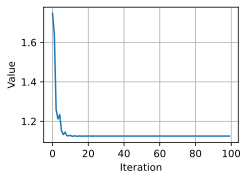

In [16]:
# Rescale the matrix A
A /= norm_eigs[-1]

# Do the same experiment again
v_in = np.random.randn(k,1)

norm_list = [np.linalg.norm(v_in)]
for i in range(1,100):
    v_in = A.dot(v_in)
    norm_list.append(np.linalg.norm(v_in))
    
d2l.plot(np.arange(0,100),norm_list,'Iteration','Value')

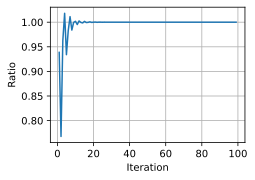

In [17]:
# Also plot the ratio
norm_ratio_list = []
for i in range(1,100):
    norm_ratio_list.append(norm_list[i]/norm_list[i-1])
    
d2l.plot(np.arange(1,100),norm_ratio_list,'Iteration','Ratio')

### Conclusions

We now see exactly what we hoped for!
After normalizing the matrices by the principle eigenvalue,
we see that the random data does not explode as before,
but rather eventually equilibrates to a specific value.
It would be nice to be able to do these things from first principles,
and it turns out that if we look deeply at the mathematics of it,
we can see that the largest eigenvalue 
of a large random matrix with independent mean zero,
variance one Gaussian entries is on average about $\sqrt{n}$,
or in our case $\sqrt{5} \approx 2.2$,
due to a fascinating fact known as the [circular law](https://en.wikipedia.org/wiki/Circular_law).
This is why almost all initialization strategies
are of the format of [Gaussians divided by the square root of the number of inputs](https://arxiv.org/abs/1704.08863).
In this way, eigenvalues form a key component
for understanding the behavior of many ML systems.

## Tensors and Common Linear Algebra Operations

In :numref:`sec_scalar-tensor` the concept of tensors was introduced.
In this section, we will dive more deeply into tensor contractions 
(the tensor equivalent of matrix multiplication),
and see how it can provide a unified view 
on a number of matrix and vector operations.  

With matrices and vectors we knew how to multiply them to transform data.
We need to have a similar definition for tensors if they are to be useful to us.
Think about matrix multiplication:

$$
\mathbf{C} = \mathbf{A}\mathbf{B}
$$

or equivalently

$$ c_{i,j} = \sum_{k} a_{i,k}b_{k,j}.$$

This pattern is one we can repeat for tensors.
For tensors, there is no one case of what 
to sum over that can be universally chosen,
so we need specify exactly which indices we want to sum over.
For instance we could consider

$$
y_{il} = \sum_{jk} x_{ijkl}a_{jk}.
$$

Such a transformation is called a *tensor contraction*.
It can represent a far more flexible family of transformations
that matrix multiplication alone. 

As a often-used notational simplification, 
we can notice that the sum is over exactly those indices
that occur more than once in the expression,
thus people often work with *Einstein notation*,
where the summation is implicitly taken over all repeated indices.
This gives the compact expression:

$$
y_{il} = x_{ijkl}a_{jk}.
$$

## Common Examples from Linear Algebra

Let us see how many of the linear algebraic definitions 
we have seen before can be expressed in this compressed tensor notation:

* $\mathbf{v} \cdot \mathbf{w} = \sum_i v_iw_i$ 
* $\|\mathbf{v}\|_2^{2} = \sum_i v_iv_i$
* $(\mathbf{A}\mathbf{v})_i = \sum_j a_{ij}v_j$
* $(\mathbf{A}\mathbf{B})_{ik} = \sum_j a_{ij}b_{jk}$
* $\mathrm{tr}(\mathbf{A}) = \sum_i a_{ii}$

In this way, we can replace a myriad of specialized notations with short tensor expressions.

## Expressing in numpy
Tensors may flexibly be operated on in code as well.
As seen in :numref:`sec_scalar-tensor`, 
we can create tensors using numpy arrays.

In [18]:
# Define Tensors
B = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
A = np.array([[1,2],[3,4]])
v = np.array([1,2])

# Print out the shapes
A.shape, B.shape, v.shape

((2, 2), (2, 2, 3), (2,))

Einstein summation has been implemented directly in numpy via ```np.einsum```. 
The indices that occurs in the Einstein summation can be passed as a string, 
followed by the tensors that are being acted upon.
For instance, to implement matrix multiplication,
we can consider the Einstein summation seen above
($\mathbf{A}\mathbf{v} = a_{ij}v_j$)
and strip out the indices themselves to get the implementation in numpy:

In [19]:
# Reimplement matrix multiplication
np.einsum("ij,j -> i",A,v), A.dot(v)

(array([ 5, 11]), array([ 5, 11]))

This is a highly flexible notation.
For instance if we want to compute 
what would be traditionally written as

$$
c_{kl} = \sum_{ij} \mathbf{B}_{ijk}\mathbf{A}_{il}v_j.
$$

it can be implemented via Einstein summation as:

In [20]:
np.einsum("ijk,il,j -> kl",B,A,v)

array([[ 90, 126],
       [102, 144],
       [114, 162]])

This notation is readable and efficient for humans,
however bulky if for whatever reason 
we need to generate a tensor contraction programmatically.
For this reason, numpy provides an alternative notation 
by providing integer indices for each tensor.
For example, the same tensor contraction can also be written as:

In [21]:
np.einsum(B,[0,1,2],A,[0,3],v,[1],[2,3])

array([[ 90, 126],
       [102, 144],
       [114, 162]])

Either notation allows for concise and efficient representation of tensor contractions in code.

## Summary
* Vectors can be interpreted geometrically as either points or directions in space.
* Dot products define the notion of angle to arbitrarily high-dimensional spaces.
* Hyperplanes are high-dimensional generalizations of lines and planes.  They can be used to define decision planes that are often used as the last step in a classification task.
* Matrix multiplication can be geometrically interpreted as uniform distortions of the underlying coordinates. They represent a very restricted, but mathematically clean, way to transform vectors.
* Linear dependence is a way to tell when a collection of vectors are in a lower dimensional space than we would expect (say you have $3$ vectors living in a $2$-dimensional space). The rank of a matrix is the size of the largest subset of its columns that are linearly independent.
* When a matrix's inverse is defined, matrix inversion allows us to find another matrix that undoes the action of the first. Matrix inversion is useful in theory, but requires care in practice owing to numerical instability.
* Determinants allow us to measure how much a matrix expands or contracts a space. A nonzero determinant implies an invertible (non-singular) matrix and a zero-valued determinant means that the matrix is non-invertible (singular).
* Eigenvalues and eigenvectors allow for a detailed understanding of the behavior of a matrix.
* Tensor contractions and Einstein summation provide for a neat and clean notation for expressing many of the computations that are seen in machine learning.

## Exercises
1. What is the angle between
$$
\vec v_1 = \begin{bmatrix}
1 \\ 0 \\ -1 \\ 2
\end{bmatrix}, \qquad \vec v_2 = \begin{bmatrix}
3 \\ 1 \\ 0 \\ 1
\end{bmatrix}?
$$
2. True or false: $\begin{bmatrix}1 & 2\\0&1\end{bmatrix}$ and $\begin{bmatrix}1 & -2\\0&1\end{bmatrix}$ are inverses of one another?
3. Suppose we draw a shape in the plane with area $100\mathrm{m}^2$.  What is the area after transforming the figure by the matrix
$$
\begin{bmatrix}
2 & 3\\
1 & 2
\end{bmatrix}.
$$
4. Which of the following sets of vectors are linearly independent?
 * $\left\{\begin{pmatrix}1\\0\\-1\end{pmatrix},\begin{pmatrix}2\\1\\-1\end{pmatrix},\begin{pmatrix}3\\1\\1\end{pmatrix}\right\}$
 * $\left\{\begin{pmatrix}3\\1\\1\end{pmatrix},\begin{pmatrix}1\\1\\1\end{pmatrix},\begin{pmatrix}0\\0\\0\end{pmatrix}\right\}$
 * $\left\{\begin{pmatrix}1\\1\\0\end{pmatrix},\begin{pmatrix}0\\1\\-1\end{pmatrix},\begin{pmatrix}1\\0\\1\end{pmatrix}\right\}$
5. Suppose you have a matrix written as $A = \begin{bmatrix}c\\d\end{bmatrix}\cdot\begin{bmatrix}a & b\end{bmatrix}$ for some choice of values $a,b,c,$ and $d$.  True or false: the determinant of such a matrix is always $0$?
6. The vectors $e_1 = \begin{bmatrix}1\\0\end{bmatrix}$ and $e_2 = \begin{bmatrix}0\\1\end{bmatrix}$ are orthogonal.  What is the condition on a matrix $A$ so that $Ae_1$ and $Ae_2$ are orthogonal?
7. What are the eigenvalues and eigenvectors of
$$
\mathbf{A} = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}?
$$
8.  What are the eigenvalues and eigenvectors of the following matrix, and what is strange about this example compared to the previous one?
$$
\mathbf{A} = \begin{bmatrix}
2 & 1 \\
0 & 2
\end{bmatrix}?
$$
9. Without computing the eigenvalues, is it possible that the smallest eigenvalue of the following matrix is less that $0.5$? *Note*: this problem can be done in your head.
$$
\mathbf{A} = \begin{bmatrix}
3.0 & 0.1 & 0.3 & 1.0 \\
0.1 & 1.0 & 0.1 & 0.2 \\
0.3 & 0.1 & 5.0 & 0.0 \\
1.0 & 0.2 & 0.0 & 1.8
\end{bmatrix}
$$
10. How can you write $\mathrm{tr}(\mathbf{A}^4)$ in Einstein notation?